<a href="https://colab.research.google.com/github/Rishekh/Airbnb-Booking-Analysis/blob/main/Airbnb_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?
* How long ago the last review was left?
* How often the host replies to inquiries?
* Mean rating of reviews given by guests? </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/Colab Notebooks/project/Airbnb.csv"
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project/Airbnb.csv")

**Lets look at the first few rows of the dataframe**

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Lets take a look at the last few rows of data set**

In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


**Number of rows and columns in the dataframe:**

In [ ]:
df.shape

(48895, 16)

**types of variables present in the dataframe:**

In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**list of columns in the dataframe:**

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Statistical Analysis of dataframe:**

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Descriptive Analysis of the dataframe. Checking for the null rate, fill rate and null values if any present in the dataframe df.**

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**replacing the null values of  column with the some value**

In [ ]:
df.fillna(value={'name':'no name','host_name':'no host name','last_review':'no review'},inplace=True)

In [ ]:
mean_value = df['reviews_per_month'].mean()
mean_value
df['reviews_per_month'].fillna(value=mean_value,inplace=True)

In [ ]:
df['reviews_per_month']

0        0.210000
1        0.380000
2        1.373221
3        4.640000
4        0.100000
           ...   
48890    1.373221
48891    1.373221
48892    1.373221
48893    1.373221
48894    1.373221
Name: reviews_per_month, Length: 48895, dtype: float64

In [ ]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**finding the percentage of null values present in the data set**

In [ ]:
percent_miss = df.isnull().sum()*100/len(df)
percent_miss

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

End of data cleaning.
Now the data is cleaned and the data set is ready to export

### All available neighbourhood in Data set

In [ ]:
list(df["neighbourhood_group"].unique())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#### Hotels in Brooklyn 

In [ ]:
Brooklyn_hotel= df[df["neighbourhood_group"]=="Brooklyn"]
Brooklyn_hotel.loc[0:900,["id","name","host_name","neighbourhood_group","minimum_nights"]]

,id,name,host_name,neighbourhood_group,minimum_nights
0,2539,Clean & quiet apt home by the park,John,Brooklyn,1
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,1
6,5121,BlissArtsSpace!,Garon,Brooklyn,45
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",Laurie,Brooklyn,4
15,6848,Only 2 stops to Manhattan studio,Allen & Irina,Brooklyn,2
...,...,...,...,...,...
890,322037,"Luxury Williamsburg, Brooklyn LOFT",James,Brooklyn,2
891,322604,Artist Loft-McCarren Park-Williamsburg-Brookly...,Todd,Brooklyn,2
894,324115,Large Master Bedroom - Williamsburg,Jason,Brooklyn,2
896,324800,Real Williamsburg Artist Loft,Mathias,Brooklyn,3


### Hotels in Manhattan

In [ ]:
Manhattan_hotel= df[df["neighbourhood_group"]=="Manhattan"]
Manhattan_hotel.loc[0:900,["id","name","host_name","neighbourhood_group","minimum_nights"]]

,id,name,host_name,neighbourhood_group,minimum_nights
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,3
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,10
5,5099,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,3
7,5178,Large Furnished Room Near B'way,Shunichi,Manhattan,2
...,...,...,...,...,...
893,323706,Elegant Spacious Family Townhouse,Ted And Diane,Manhattan,30
895,324517,Central Park Fifth Av MET Museum,S,Manhattan,1
897,325429,Lovely Upper East Yorkville 1 BDRM,Sara,Manhattan,4
898,326832,Cozy Upper East Side Studio,Nitzan,Manhattan,2


### Hotels in Queens

In [ ]:
Queens_hotel= df[df["neighbourhood_group"]=="Queens"]
Queens_hotel.loc[0:900,["id","name","host_name","neighbourhood_group","minimum_nights"]]

,id,name,host_name,neighbourhood_group,minimum_nights
46,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",Orestes,Queens,3
77,18198,Little King of Queens,Justin,Queens,30
143,32363,Fully Furnished Basement Apartment,Fredah,Queens,2
161,39593,"A room w/ a Manhattan view, longer stay",Myung,Queens,30
181,45910,Beautiful Queens Brownstone! - 5BR,Mark,Queens,8
196,51850,( F) Excellent/Pvt Rm,Jullett,Queens,2
199,53469,cozy studio with parking spot,Mark,Queens,30
200,53470,Clean and convenient 2BR apartment,Mark,Queens,7
201,53477,3 floors of luxury!,Mark,Queens,7
218,57166,Elegant NYC Pad,Vasili,Queens,2


### Hotels in Staten Island





In [ ]:
Staten_Island_hotel= df[df["neighbourhood_group"]=="Staten Island"]
Staten_Island_hotel.loc[0:900,["id","name","host_name","neighbourhood_group","minimum_nights"]]

,id,name,host_name,neighbourhood_group,minimum_nights
169,42882,New York room with a view,Newyorkroomwithaview,Staten Island,2
249,62452,A SpeciaL!! Private Room in NY,Lissette,Staten Island,2
250,62461,B NYC Staten Alternative...,Lissette,Staten Island,2
251,62787,C Private Room By The Ferry,Lissette,Staten Island,2
256,63320,D Private Che@p Room 2 Explore NYC,Lissette,Staten Island,2
571,214917,New Clean Spacious Bed & Breakfast,Carmel,Staten Island,2
598,225976,Sunny cozy multileveled apartment!,Marina,Staten Island,6
702,258838,"Oceanview,close to Manhattan",Marina,Staten Island,2
703,258876,"Affordable rooms,all transportation",Marina,Staten Island,7
704,259946,"Budget stay, near transportation",Marina,Staten Island,2


### Hotels in Bronx 





In [ ]:
Bronx_hotel= df[df["neighbourhood_group"]=="Bronx"]
Bronx_hotel.loc[0:900,["id","name","host_name","neighbourhood_group","minimum_nights"]]

,id,name,host_name,neighbourhood_group,minimum_nights
171,44096,Room with a View,Waundell,Bronx,1
207,54626,Cozy bedroom by Yankee Stadium,Waundell,Bronx,1
260,63588,LL3,Carol Gloria,Bronx,2
261,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,Vie,Bronx,2
309,71812,Condo Apartment with laundry in unit,Thai,Bronx,30
433,149777,Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...,"Dee, Dre & Mama Shelley",Bronx,1
484,169306,Affordable & Cozy,Vanessa,Bronx,4
510,182177,A PRIVATE FLAT / APARTMENT- $SPECIAL$,Christian & Carla,Bronx,2
557,206071,Yankee Stadium Oasis 2 stops to Manhattan!,Lori,Bronx,3
610,230854,Zen Yankee Stadium Pad 5 Minutes To Manhattan!,Lori,Bronx,5


In [ ]:
neighbourhood= df['neighbourhood_group'].value_counts()


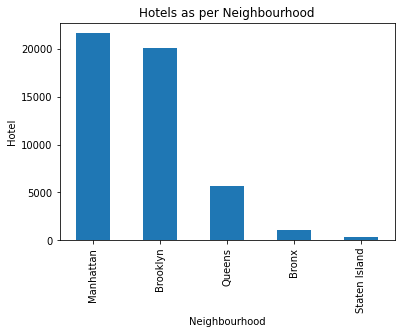

In [ ]:
 neighbourhood.plot(kind='bar')

plt.title('Hotels as per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Hotel')
plt.rcParams['figure.figsize']=(20,4)

### Hotels which provide only private room.

In [6]:
private_room_hotel=df[df["room_type"]=="Private room"]
private_room_hotel

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36


In [7]:
Private_room=private_room_hotel.loc[0:48894,["neighbourhood_group"]].value_counts()

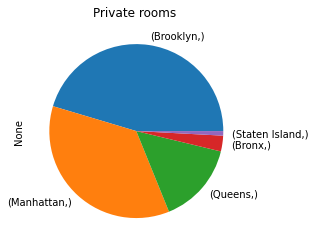

In [ ]:
Private_room.plot(kind='pie')

plt.title('Private rooms ')

plt.rcParams['figure.figsize']=(50,4)

In [ ]:
Types_of_rooms= df['room_type'].value_counts()

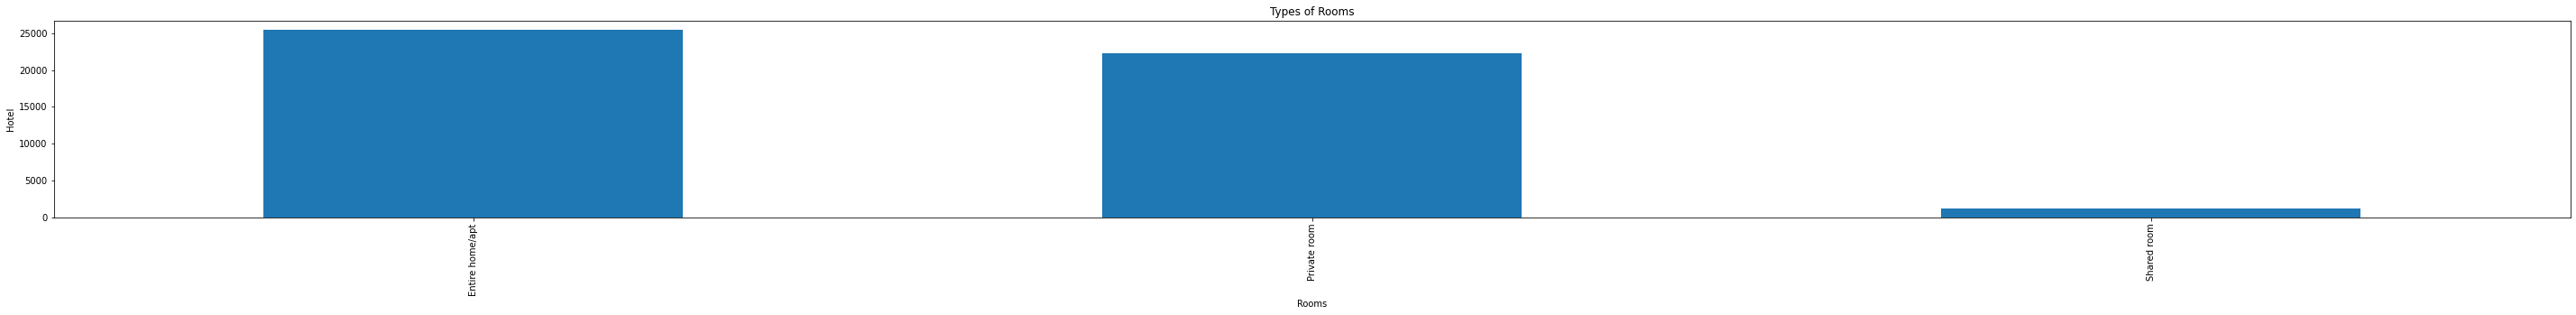

In [ ]:
Types_of_rooms.plot(kind='bar')

plt.title('Types of Rooms')
plt.xlabel('Rooms')
plt.ylabel('Hotel')
plt.rcParams['figure.figsize']=(20,4)

##Minimum Nights 

In [ ]:
Minimum_night=df['minimum_nights'].value_counts()

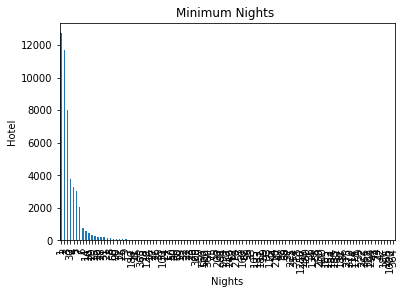

In [ ]:
Minimum_night.plot(kind='bar')

plt.title('Minimum Nights ')
plt.xlabel('Nights')
plt.ylabel('Hotel')
plt.rcParams['figure.figsize']=(30,5)

###Hotels with minimum night two or more.

In [ ]:
hotel_for_2_days= df[df["minimum_nights"]>=2]

In [ ]:
hotel_for_2_days

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27


### Rooms which cost less than or equal to 100.

In [8]:
cost_less_than_or_equal_to_100=private_room_hotel[private_room_hotel["price"] <=100]

In [9]:
cost_less_than_or_equal_to_100

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.50,1,39
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
